In [1]:
import pygad
import numpy

Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.

In [2]:
function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 44 # Function output.

In [3]:
def fitness_func(ga_instance, solution, solution_idx):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / numpy.abs(output - desired_output)
    return fitness

fitness_function = fitness_func

In [4]:
num_generations = 100 # Number of generations.
num_parents_mating = 7 # Number of solutions to be selected as parents in the mating pool.

To prepare the initial population, there are 2 ways:
1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.

In [5]:
sol_per_pop = 50 # Number of solutions in the population.
num_genes = len(function_inputs)

In [6]:
last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution()[1]}")
    print(f"Change     = {ga_instance.best_solution()[1] - last_fitness}")
    last_fitness = ga_instance.best_solution()[1]

Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.

In [7]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       on_generation=callback_generation)

/opt/conda/lib/python3.11/site-packages/pygad/pygad.py:728: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Running the GA to optimize the parameters of the function.

In [8]:
ga_instance.run()

Generation = 1
Fitness    = 9.428417051133692
Change     = 9.428417051133692
Generation = 2
Fitness    = 9.428417051133692
Change     = 0.0
Generation = 3
Fitness    = 9.428417051133692
Change     = 0.0
Generation = 4
Fitness    = 9.428417051133692
Change     = 0.0
Generation = 5
Fitness    = 21.036544487276178
Change     = 11.608127436142485
Generation = 6
Fitness    = 21.036544487276178
Change     = 0.0
Generation = 7
Fitness    = 2150.9370332677336
Change     = 2129.900488780457
Generation = 8
Fitness    = 2150.9370332677336
Change     = 0.0
Generation = 9
Fitness    = 2150.9370332677336
Change     = 0.0
Generation = 10
Fitness    = 2150.9370332677336
Change     = 0.0
Generation = 11
Fitness    = 2150.9370332677336
Change     = 0.0
Generation = 12
Fitness    = 2150.9370332677336
Change     = 0.0
Generation = 13
Fitness    = 2150.9370332677336
Change     = 0.0
Generation = 14
Fitness    = 2150.9370332677336
Change     = 0.0
Generation = 15
Fitness    = 2150.9370332677336
Change     =

After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


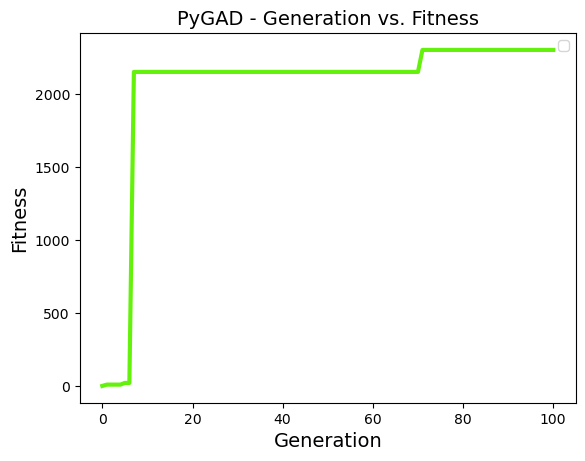

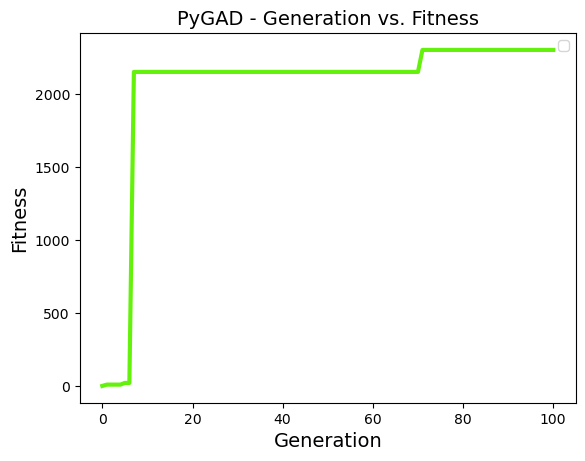

In [9]:
ga_instance.plot_fitness()

Returning the details of the best solution.

In [10]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

Parameters of the best solution : [-1.49790162 -3.42647688 -0.18983283  0.25156012 -2.77157237 -2.56543328]
Fitness value of the best solution = 2301.5952718763724
Index of the best solution : 0


In [11]:
prediction = numpy.sum(numpy.array(function_inputs)*solution)
print(f"Predicted output based on the best solution : {prediction}")

Predicted output based on the best solution : 43.99956551874597


In [12]:
if ga_instance.best_solution_generation != -1:
    print(f"Best fitness value reached after {ga_instance.best_solution_generation} generations.")

Best fitness value reached after 71 generations.


Saving the GA instance.

In [13]:
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

Loading the saved GA instance.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


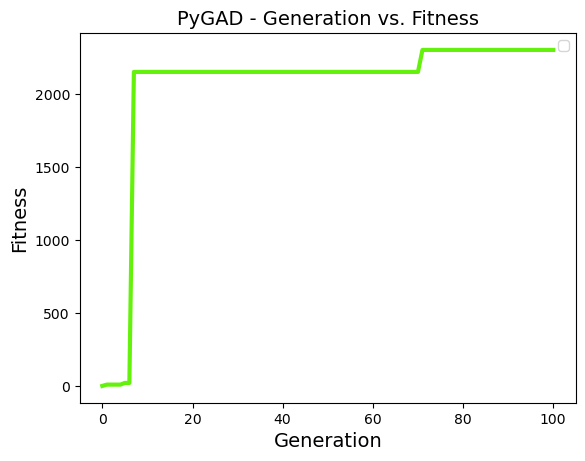

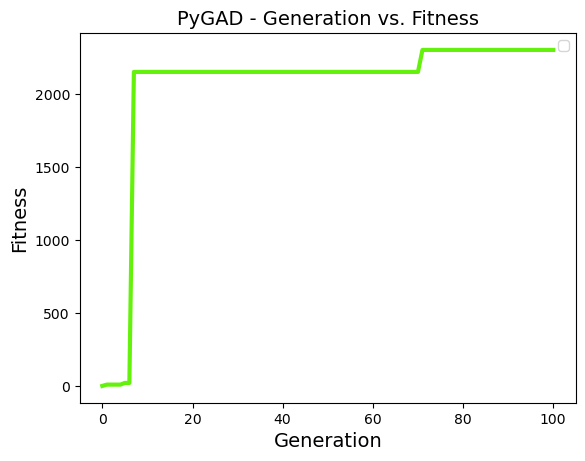

In [14]:
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()